**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Mentoría**

*Edición 2023*

----

# Entrenamiento de los modelos y predicción

## Ejercicio 4 - Evaluación de métricas:

Analizar métricas **Precision**, **Recall** y **Matriz de confusión** para ver el funcionamiento del modelo encontrado.

[Dealing with no imbalanced data](https://www.kaggle.com/code/tboyle10/methods-for-dealing-with-imbalanced-data)

----

### Imports

In [1]:
import pandas as pd

from sklearn.model_selection import StratifiedKFold
from tune_sklearn import TuneGridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import resample
from utils.metrics import plot_confusion_matrix
from imblearn.over_sampling import SMOTE

import joblib

### Lectura de datasets

In [2]:
events_train = pd.read_csv('https://gitlab.com/diplodatos/mentoria/-/raw/main/parte_2/datasets/events_train_cured.csv')
events_dev = pd.read_csv('https://gitlab.com/diplodatos/mentoria/-/raw/main/parte_2/datasets/events_dev_cured.csv')
events_train.shape, events_dev.shape

((191748, 3), (48438, 3))

In [3]:
events_train.head()

frases  noticia evento
0  jti report warn gather storm black market engl...        1      O
1  11 2020 jti japan tobacco international publis...        1      O
2  entitle gather storm illegal tobacco trade ope...        1      O
3  law enforcement agency around world welcome re...        1      O
4  jti intelligence find global public health cri...        1      O

In [4]:
events_dev.head()

frases  noticia evento
0  frisch restaurant inc clarifies payment specia...        1   I-SD
1                                     cincinnati aug        1      O
2                        22 2012 previously announce        1      O
3  frisch restaurant inc nyse mkt fr declare spec...        1   I-SD
4  payable september 14 2012 shareholder record a...        1      O

In [5]:
events_train_vectors = pd.read_csv('https://gitlab.com/diplodatos/mentoria/-/raw/main/parte_2/vectors/events_train_vectors.csv')
events_dev_vectors = pd.read_csv('https://gitlab.com/diplodatos/mentoria/-/raw/main/parte_2/vectors/events_dev_vectors.csv')
events_train_vectors.shape, events_dev_vectors.shape

((191748, 300), (48438, 300))

### Recuperación de modelos

Se instancian los modelos entrenados en el notebook 3 para analizar las métricas obtenidas por cada uno más en detalle.

In [6]:
rf = joblib.load('./models/rf.pkl')
tree = joblib.load('./models/tree.pkl')
svc = joblib.load('./models/svc.pkl')

### Análisis de métricas

Resulta de interés analizar a través de métricas, por lo tanto, se utilizarán las herramientas como **classification_report** y **confusion_matrix** de *Sklearn* para tener más detalle de la precisión de cada modelo.

#### Random forest

In [35]:
# Predicción
rf_train_pred = rf.predict(events_train_vectors)
rf_val_pred = rf.predict(events_dev_vectors)

In [36]:
print(f'Train report:\n{classification_report(events_train.evento, rf_train_pred)}')

Train report:
              precision    recall  f1-score   support

         I-A       0.99      0.94      0.97       363
        I-CT       1.00      0.96      0.98       498
        I-DC       1.00      0.96      0.98       156
        I-DI       0.99      0.99      0.99       350
        I-GC       1.00      0.95      0.97       150
        I-NC       1.00      0.96      0.98       828
        I-RD       1.00      0.99      0.99       440
       I-RSS       1.00      0.96      0.98        78
        I-SD       1.00      1.00      1.00       122
        I-SR       0.99      0.99      0.99       622
        I-SS       1.00      0.95      0.97       123
           O       1.00      1.00      1.00    188018

    accuracy                           1.00    191748
   macro avg       1.00      0.97      0.98    191748
weighted avg       1.00      1.00      1.00    191748


Observamos que las métricas obtenidas con el modelo *RandomForest* para el dataset de entrenamiento son excelentes.

In [37]:
print(f'Test report:\n{classification_report(events_dev.evento, rf_val_pred)}')

Test report:
              precision    recall  f1-score   support

         I-A       0.79      0.12      0.21        90
        I-CT       0.94      0.25      0.39       125
        I-DC       1.00      0.28      0.44        43
        I-DI       0.83      0.80      0.81        84
        I-GC       0.94      0.38      0.54        40
        I-NC       0.94      0.28      0.43       206
        I-RD       0.91      0.77      0.83       114
       I-RSS       1.00      0.32      0.48        22
        I-SD       0.86      0.61      0.72        31
        I-SR       0.85      0.75      0.80       148
        I-SS       1.00      0.50      0.67        28
           O       0.99      1.00      0.99     47507

    accuracy                           0.99     48438
   macro avg       0.92      0.50      0.61     48438
weighted avg       0.99      0.99      0.99     48438


Ahora con el dataset de test, este modelo mantiene buen *accuracy*, pero las métricas *f1* y *recall* se deterioran.  
La métrica *recall* es la proporción de positivos correctos que fueron encontrados por el modelo:

\begin{align}Recall = \frac{TruePositive}{TruePositive+FalseNegative}\end{align}

Mientras que la métrica *F1* resulta de una combinación de las métricas *precision* y *recall*:

\begin{align}F1 = \frac{2*Precision*Recall}{Precision+Recall}\end{align}

Se podría pensar que este comportamiento es debido al enorme desbalance que existe en los datos de entrenamiento y validación.

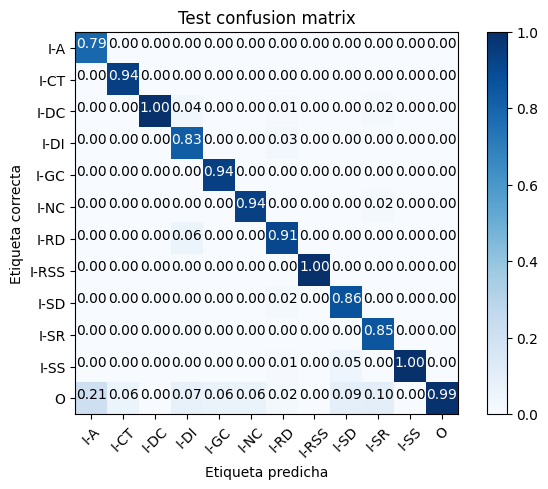

In [38]:
plot_confusion_matrix(confusion_matrix(events_dev.evento, rf_val_pred, normalize='pred'),
                      ['I-A', 'I-CT', 'I-DC', 'I-DI', 'I-GC', 'I-NC', 'I-RD', 'I-RSS', 'I-SD', 'I-SR', 'I-SS', 'O'],
                      title='Test confusion matrix')

#### Árboles de decisión

In [39]:
# Predicción
tree_train_pred = tree.predict(events_train_vectors)
tree_val_pred = tree.predict(events_dev_vectors)

In [40]:
print(f'Train report:\n{classification_report(events_train.evento, tree_train_pred)}')

Train report:
              precision    recall  f1-score   support

         I-A       0.99      1.00      1.00       363
        I-CT       1.00      1.00      1.00       498
        I-DC       1.00      1.00      1.00       156
        I-DI       0.99      1.00      1.00       350
        I-GC       1.00      0.99      1.00       150
        I-NC       1.00      1.00      1.00       828
        I-RD       0.99      1.00      1.00       440
       I-RSS       0.97      1.00      0.99        78
        I-SD       1.00      1.00      1.00       122
        I-SR       1.00      1.00      1.00       622
        I-SS       0.99      0.98      0.99       123
           O       1.00      1.00      1.00    188018

    accuracy                           1.00    191748
   macro avg       1.00      1.00      1.00    191748
weighted avg       1.00      1.00      1.00    191748


Las métricas obtenidas por el modelo de *Árboles de decisión * son buenas en el dataset de entrenamiento, al igual que en el modelo previo.

In [41]:
print(f'Test report:\n{classification_report(events_dev.evento, tree_val_pred)}')

Test report:
              precision    recall  f1-score   support

         I-A       0.23      0.22      0.23        90
        I-CT       0.36      0.36      0.36       125
        I-DC       0.39      0.35      0.37        43
        I-DI       0.67      0.74      0.70        84
        I-GC       0.47      0.55      0.51        40
        I-NC       0.38      0.41      0.39       206
        I-RD       0.66      0.69      0.68       114
       I-RSS       0.50      0.41      0.45        22
        I-SD       0.58      0.68      0.63        31
        I-SR       0.66      0.77      0.71       148
        I-SS       0.40      0.50      0.44        28
           O       0.99      0.99      0.99     47507

    accuracy                           0.98     48438
   macro avg       0.52      0.56      0.54     48438
weighted avg       0.98      0.98      0.98     48438


Comparando las métricas de este modelo con el anterior, se observa un deterioro aún mayor en el dataset de validación, incluyendo en la métrica *accuracy* de cada evento.

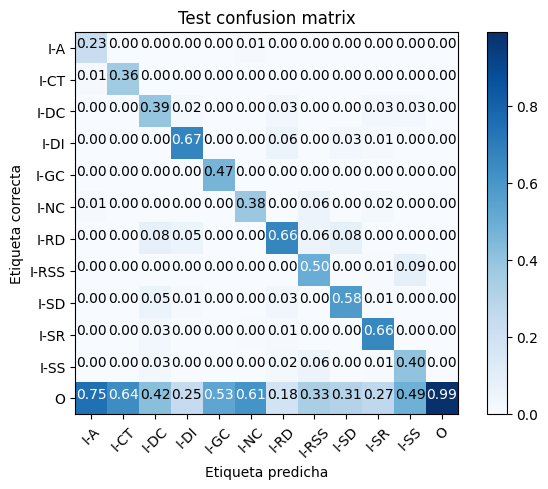

In [42]:
plot_confusion_matrix(confusion_matrix(events_dev.evento, tree_val_pred, normalize='pred'),
                      ['I-A', 'I-CT', 'I-DC', 'I-DI', 'I-GC', 'I-NC', 'I-RD', 'I-RSS', 'I-SD', 'I-SR', 'I-SS', 'O'],
                      title='Test confusion matrix')

#### SVM

In [43]:
# Predicción
svc_train_pred = svc.predict(events_train_vectors)
svc_val_pred = svc.predict(events_dev_vectors)

In [44]:
print(f'Train report:\n{classification_report(events_train.evento, svc_train_pred)}')

Train report:
              precision    recall  f1-score   support

         I-A       0.98      0.92      0.95       363
        I-CT       0.99      0.95      0.97       498
        I-DC       0.97      0.95      0.96       156
        I-DI       0.94      0.97      0.95       350
        I-GC       0.98      0.88      0.93       150
        I-NC       0.97      0.91      0.94       828
        I-RD       0.97      0.99      0.98       440
       I-RSS       0.99      0.94      0.96        78
        I-SD       0.98      1.00      0.99       122
        I-SR       0.96      0.96      0.96       622
        I-SS       0.99      0.98      0.99       123
           O       1.00      1.00      1.00    188018

    accuracy                           1.00    191748
   macro avg       0.98      0.95      0.96    191748
weighted avg       1.00      1.00      1.00    191748


Las métricas para el dataset de entrenamiento son muy buenas para los 3 modelos analizados, como es de esperar. 

In [45]:
print(f'Test report:\n{classification_report(events_dev.evento, svc_val_pred)}')

Test report:
              precision    recall  f1-score   support

         I-A       0.80      0.59      0.68        90
        I-CT       0.94      0.82      0.88       125
        I-DC       0.97      0.72      0.83        43
        I-DI       0.93      0.94      0.93        84
        I-GC       0.88      0.75      0.81        40
        I-NC       0.86      0.77      0.81       206
        I-RD       0.95      0.93      0.94       114
       I-RSS       0.91      0.91      0.91        22
        I-SD       0.94      0.97      0.95        31
        I-SR       0.88      0.93      0.91       148
        I-SS       0.96      0.96      0.96        28
           O       1.00      1.00      1.00     47507

    accuracy                           1.00     48438
   macro avg       0.92      0.86      0.88     48438
weighted avg       1.00      1.00      1.00     48438


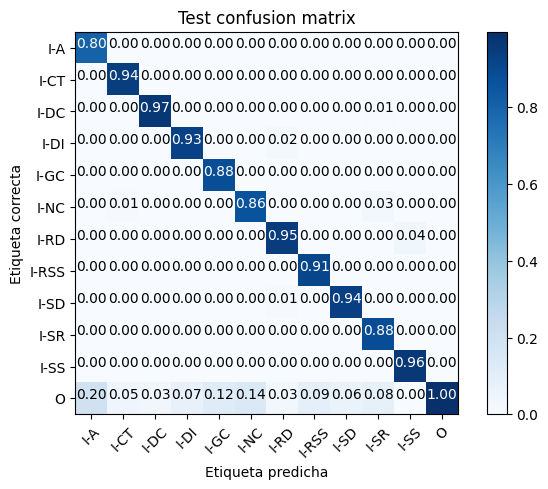

In [46]:
plot_confusion_matrix(confusion_matrix(events_dev.evento, svc_val_pred, normalize='pred'),
                      ['I-A', 'I-CT', 'I-DC', 'I-DI', 'I-GC', 'I-NC', 'I-RD', 'I-RSS', 'I-SD', 'I-SR', 'I-SS', 'O'],
                      title='Test confusion matrix')

Analizando las métricas del dataset de validación, observamos que estas se degradan, pero no en gran proporción como en los métodos anteriores. Por lo que podríamos afirmar que es un excelente modelo para predecir eventos en el dataset de noticias.

### Clases no balanceadas

Como se observó en el análisis de métricas anterior, se observa un claro desbalance en las clases, existiendo una cantidad excesiva de eventos tipo **O** en comparación con los demás eventos. La mayoría de los algoritmos de aprendizaje automático funcionan mejor cuando el número de muestras en cada clase es aproximadamente igual. Esto se debe a que la mayoría de los algoritmos están diseñados para maximizar la precisión y reducir el error.  
Con el objetivo de hacer un mejor análisis de métricas, se utilizarán técnicas para tratar con dataset desbalanceados.

* Over-sampling minority class
* Under-sampling majority class
* Synthetic Minority Oversampling Technique (SMOTE)


In [47]:
# Concatenate our training data back together
X = pd.concat([events_train_vectors, events_train.evento], axis=1)
X.head()

0         1         2         3         4         5         6  \
0 -0.008874 -0.045964 -0.063151 -0.051511 -0.074134 -0.073256  0.032245   
1 -0.133301 -0.165588 -0.101364  0.052795  0.023788  0.044769  0.076813   
2  0.043245 -0.041152 -0.046448  0.053418  0.012972 -0.031055 -0.018831   
3 -0.062164 -0.022589  0.036346  0.059311 -0.010708 -0.061056  0.011789   
4  0.018397  0.031165 -0.082949  0.067194 -0.083540 -0.036988 -0.016176   

          7         8         9  ...       291       292       293       294  \
0 -0.063749  0.102234  0.060491  ...  0.034076 -0.039832  0.021879 -0.045089   
1 -0.059143  0.152847 -0.018059  ...  0.026978  0.048134  0.058838 -0.137146   
2 -0.015637  0.087447  0.046460  ...  0.002151  0.003345  0.013859 -0.005650   
3 -0.101343  0.074154  0.077420  ... -0.000539  0.044818  0.018805  0.025520   
4 -0.117709  0.126220  0.028905  ...  0.061327 -0.101342 -0.016192 -0.042775   

        295       296       297       298       299  evento  
0 -0.019996 -0.010658 -0.052838  0.057936 -0.001831       O  
1 -0.056305  0.014572  0.070068  0.025984 -0.075928       O  
2  0.022762  0.037496 -0.012187  0.130583 -0.001736       O  
3  0.034998  0.031622 -0.046179  0.077576 -0.054565       O  
4  0.005639 -0.011947  0.011859  0.063157 -0.026038       O  

[5 rows x 301 columns]

#### Over-sampling minority class

Se puede definir como agregar más copias de la clase minoritaria. El *oversampling* puede ser una buena opción cuando no tiene una gran cantidad de datos con los que trabajar. Una desventaja a considerar al realizar un submuestreo es que puede causar un sobreajuste y una mala generalización en su conjunto de pruebas.

In [48]:
# Separate minority and majority classes
not_event = X[X.evento == 'O']
event = X[X.evento != 'O']

# Over-sample minority
event_oversampled = resample(event,
                             replace=True, # sample with replacement
                             n_samples=len(not_event), # match number in majority class
                             random_state=0) # reproducible results

# Combine majority and oversampled minority
oversampled = pd.concat([not_event, event_oversampled])

# Check new class counts
oversampled.evento.value_counts()

evento
O        188018
I-NC      41699
I-SR      31551
I-CT      24970
I-RD      22132
I-A       18480
I-DI      17556
I-DC       7795
I-GC       7435
I-SS       6303
I-SD       6076
I-RSS      4021
Name: count, dtype: int64

In [49]:
# Trying model again with the balanced dataset
y_train = oversampled.evento
X_train = oversampled.drop('evento', axis=1)

##### Random forest

In [50]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
rf_params = {'n_estimators': 10, 'criterion': 'entropy', 'min_samples_leaf': 1}
rf = RandomForestClassifier(**rf_params, random_state=0).fit(X_train, y_train)

In [51]:
# Predicción
rf_train_pred = rf.predict(X_train)
rf_val_pred = rf.predict(events_dev_vectors)

In [52]:
print(f'Train report:\n{classification_report(y_train, rf_train_pred)}')

Train report:
              precision    recall  f1-score   support

         I-A       1.00      1.00      1.00     18480
        I-CT       1.00      1.00      1.00     24970
        I-DC       1.00      1.00      1.00      7795
        I-DI       1.00      1.00      1.00     17556
        I-GC       1.00      0.99      1.00      7435
        I-NC       1.00      1.00      1.00     41699
        I-RD       1.00      1.00      1.00     22132
       I-RSS       1.00      1.00      1.00      4021
        I-SD       1.00      1.00      1.00      6076
        I-SR       1.00      1.00      1.00     31551
        I-SS       1.00      1.00      1.00      6303
           O       1.00      1.00      1.00    188018

    accuracy                           1.00    376036
   macro avg       1.00      1.00      1.00    376036
weighted avg       1.00      1.00      1.00    376036


In [53]:
print(f'Test report:\n{classification_report(events_dev.evento, rf_val_pred)}')

Test report:
              precision    recall  f1-score   support

         I-A       0.62      0.20      0.30        90
        I-CT       0.81      0.38      0.51       125
        I-DC       0.81      0.30      0.44        43
        I-DI       0.84      0.81      0.82        84
        I-GC       0.91      0.53      0.67        40
        I-NC       0.83      0.40      0.54       206
        I-RD       0.91      0.75      0.82       114
       I-RSS       1.00      0.36      0.53        22
        I-SD       0.90      0.61      0.73        31
        I-SR       0.86      0.78      0.82       148
        I-SS       1.00      0.61      0.76        28
           O       0.99      1.00      0.99     47507

    accuracy                           0.99     48438
   macro avg       0.87      0.56      0.66     48438
weighted avg       0.99      0.99      0.99     48438


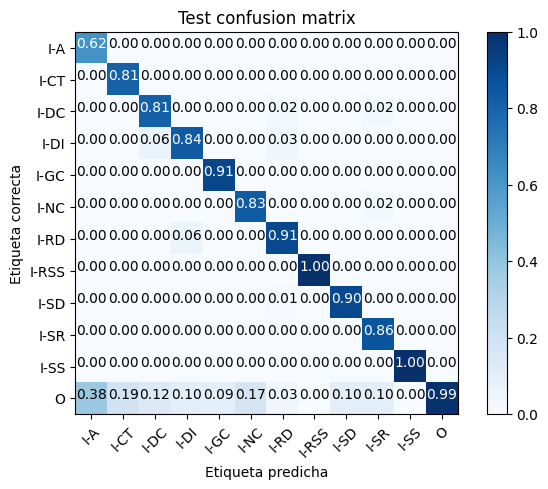

In [54]:
plot_confusion_matrix(confusion_matrix(events_dev.evento, rf_val_pred, normalize='pred'),
                      ['I-A', 'I-CT', 'I-DC', 'I-DI', 'I-GC', 'I-NC', 'I-RD', 'I-RSS', 'I-SD', 'I-SR', 'I-SS', 'O'],
                      title='Test confusion matrix')

Las métricas en el dataset de entrenamiento *over-sampled* son perfectas, en cambio, en las métricas del dataset de validación se notan mejoras, pero muy sutiles.

##### Árboles de decisión

In [55]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
tree_params = {'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2}
tree = DecisionTreeClassifier(**tree_params, random_state=0).fit(X_train, y_train)

In [56]:
# Predicción
tree_train_pred = tree.predict(X_train)
tree_val_pred = tree.predict(events_dev_vectors)

In [57]:
print(f'Train report:\n{classification_report(y_train, tree_train_pred)}')

Train report:
              precision    recall  f1-score   support

         I-A       1.00      1.00      1.00     18480
        I-CT       1.00      1.00      1.00     24970
        I-DC       1.00      1.00      1.00      7795
        I-DI       1.00      1.00      1.00     17556
        I-GC       1.00      0.99      1.00      7435
        I-NC       1.00      1.00      1.00     41699
        I-RD       1.00      1.00      1.00     22132
       I-RSS       1.00      1.00      1.00      4021
        I-SD       1.00      1.00      1.00      6076
        I-SR       1.00      1.00      1.00     31551
        I-SS       1.00      1.00      1.00      6303
           O       1.00      1.00      1.00    188018

    accuracy                           1.00    376036
   macro avg       1.00      1.00      1.00    376036
weighted avg       1.00      1.00      1.00    376036


In [58]:
print(f'Test report:\n{classification_report(events_dev.evento, tree_val_pred)}')

Test report:
              precision    recall  f1-score   support

         I-A       0.39      0.37      0.38        90
        I-CT       0.39      0.38      0.38       125
        I-DC       0.40      0.44      0.42        43
        I-DI       0.59      0.79      0.67        84
        I-GC       0.59      0.60      0.59        40
        I-NC       0.44      0.47      0.46       206
        I-RD       0.69      0.67      0.68       114
       I-RSS       0.60      0.55      0.57        22
        I-SD       0.51      0.58      0.55        31
        I-SR       0.72      0.72      0.72       148
        I-SS       0.44      0.50      0.47        28
           O       0.99      0.99      0.99     47507

    accuracy                           0.98     48438
   macro avg       0.56      0.59      0.57     48438
weighted avg       0.98      0.98      0.98     48438


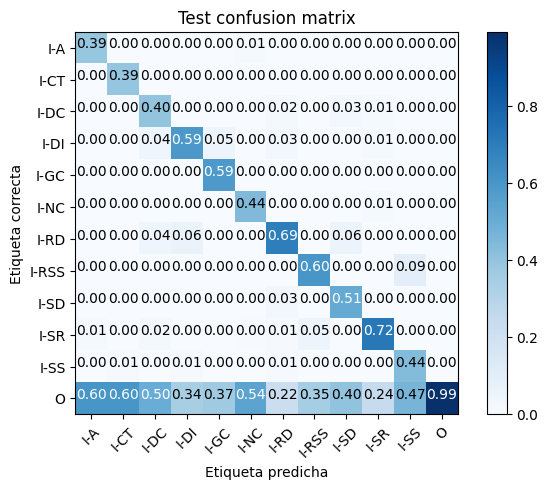

In [59]:
plot_confusion_matrix(confusion_matrix(events_dev.evento, tree_val_pred, normalize='pred'),
                      ['I-A', 'I-CT', 'I-DC', 'I-DI', 'I-GC', 'I-NC', 'I-RD', 'I-RSS', 'I-SD', 'I-SR', 'I-SS', 'O'],
                      title='Test confusion matrix')

No se detectan mejoras sustanciales al entrenar el modelo de *árboles de decisión* con el dataset *over-sampled*.

##### SVM

In [60]:
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
svm_params = {'kernel': 'rbf', 'C': 5}
svm = SVC(**svm_params, random_state=0).fit(X_train, y_train)

In [61]:
# Predicción
svc_train_pred = svc.predict(X_train)
svc_val_pred = svc.predict(events_dev_vectors)

In [62]:
print(f'Train report:\n{classification_report(y_train, svc_train_pred)}')

Train report:
              precision    recall  f1-score   support

         I-A       1.00      0.92      0.96     18480
        I-CT       1.00      0.95      0.98     24970
        I-DC       1.00      0.95      0.97      7795
        I-DI       0.97      0.97      0.97     17556
        I-GC       1.00      0.89      0.94      7435
        I-NC       1.00      0.91      0.95     41699
        I-RD       0.99      0.99      0.99     22132
       I-RSS       1.00      0.94      0.97      4021
        I-SD       0.99      1.00      1.00      6076
        I-SR       0.99      0.96      0.97     31551
        I-SS       1.00      0.98      0.99      6303
           O       0.95      1.00      0.98    188018

    accuracy                           0.97    376036
   macro avg       0.99      0.95      0.97    376036
weighted avg       0.97      0.97      0.97    376036


In [63]:
print(f'Test report:\n{classification_report(events_dev.evento, svc_val_pred)}')

Test report:
              precision    recall  f1-score   support

         I-A       0.80      0.59      0.68        90
        I-CT       0.94      0.82      0.88       125
        I-DC       0.97      0.72      0.83        43
        I-DI       0.93      0.94      0.93        84
        I-GC       0.88      0.75      0.81        40
        I-NC       0.86      0.77      0.81       206
        I-RD       0.95      0.93      0.94       114
       I-RSS       0.91      0.91      0.91        22
        I-SD       0.94      0.97      0.95        31
        I-SR       0.88      0.93      0.91       148
        I-SS       0.96      0.96      0.96        28
           O       1.00      1.00      1.00     47507

    accuracy                           1.00     48438
   macro avg       0.92      0.86      0.88     48438
weighted avg       1.00      1.00      1.00     48438


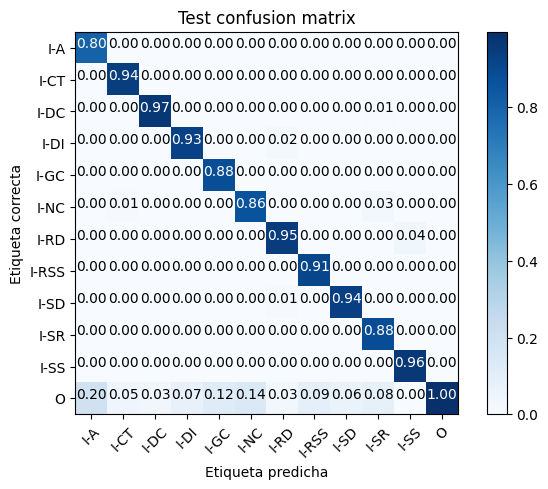

In [64]:
plot_confusion_matrix(confusion_matrix(events_dev.evento, svc_val_pred, normalize='pred'),
                      ['I-A', 'I-CT', 'I-DC', 'I-DI', 'I-GC', 'I-NC', 'I-RD', 'I-RSS', 'I-SD', 'I-SR', 'I-SS', 'O'],
                      title='Test confusion matrix')

Al igual que ocurrió con los 2 modelos anteriores, las métricas para el dataset de entrenamiento *over-sampled* son perfectas, pero en este caso las métricas para el dataset de prueba se mantienen similares a las obtenidas anteriormente.

Como mencionamos anteriormente, al realizar sobre-muestreo estamos introduciendo sobreajuste de los datos. Esto ocurre ya que en nuestro dataset original, por ejemplo, se tiene un total de 78 frases con evento tipo **I-RSS**. Luego de aplicar *oversampling*, se obtienen un total de **4021** registros de eventos de este tipo, lo que significa que cada frase se repite **51** veces en el dataset sobremuestreado. Esta es la causa que las métricas en el dataset de entrenamiento sean perfectas, el modelo aprende a predecir frases en particular, ya que se entrena repetidamente con el mismo dato en lugar de aprender las características de los eventos de este tipo en particular.

#### Under-sampling majority class

El *under-sampling* se puede definir como la eliminación de algunas observaciones de la clase mayoritaria. El sub-muestreo puede ser una buena opción cuando tienes una gran cantidad de datos (piensa en millones de filas), pero una desventaja es que eliminamos información que puede ser valiosa.

In [65]:
# Under-sample majority
event_undersampled = resample(not_event, 
                              replace=True, # sample with replacement 
                              n_samples=len(event), # match number in minority class
                              random_state=0) # reproducible results

# Combine minority and under-sampled majority
undersampled = pd.concat([event, event_undersampled])

# Check new class counts
undersampled.evento.value_counts()

evento
O        3730
I-NC      828
I-SR      622
I-CT      498
I-RD      440
I-A       363
I-DI      350
I-DC      156
I-GC      150
I-SS      123
I-SD      122
I-RSS      78
Name: count, dtype: int64

In [66]:
# Trying model again with the balanced dataset
y_train = undersampled.evento
X_train = undersampled.drop('evento', axis=1)

Una vez que se obtienen los datasets submuestrados, se realizará nuevamente la búsqueda de hiperparámetros para encontrar la misma combinación de los mismos.

In [67]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

##### Random forest

In [68]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
rf_params = {
    'n_estimators': [10, 50, 100],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [1, 3],
}

In [69]:
rf_model = RandomForestClassifier(random_state=0)
rf_cv = TuneGridSearchCV(rf_model, rf_params, scoring='f1_macro', cv=kf, n_jobs=8)
rf_cv.fit(X_train,y_train)

TuneGridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
                 estimator=RandomForestClassifier(random_state=0), mode='max',
                 n_jobs=8,
                 param_grid={'criterion': ['gini', 'entropy'],
                             'min_samples_leaf': [1, 3],
                             'n_estimators': [10, 50, 100]},
                 scoring='f1_macro', sk_n_jobs=1)

In [70]:
rf_cv.best_params_, rf_cv.best_score_

({'n_estimators': 50, 'criterion': 'entropy', 'min_samples_leaf': 1},
 0.8714586084527476)

In [71]:
rf = RandomForestClassifier(**rf_cv.best_params_, random_state=0).fit(X_train, y_train)

In [72]:
# Predicción
rf_train_pred = rf.predict(X_train)
rf_val_pred = rf.predict(events_dev_vectors)

In [73]:
print(f'Train report:\n{classification_report(y_train, rf_train_pred)}')

Train report:
              precision    recall  f1-score   support

         I-A       1.00      1.00      1.00       363
        I-CT       1.00      1.00      1.00       498
        I-DC       1.00      1.00      1.00       156
        I-DI       1.00      1.00      1.00       350
        I-GC       1.00      0.99      1.00       150
        I-NC       1.00      1.00      1.00       828
        I-RD       1.00      1.00      1.00       440
       I-RSS       1.00      1.00      1.00        78
        I-SD       1.00      1.00      1.00       122
        I-SR       1.00      1.00      1.00       622
        I-SS       1.00      1.00      1.00       123
           O       1.00      1.00      1.00      3730

    accuracy                           1.00      7460
   macro avg       1.00      1.00      1.00      7460
weighted avg       1.00      1.00      1.00      7460


In [74]:
print(f'Test report:\n{classification_report(events_dev.evento, rf_val_pred)}')

Test report:
              precision    recall  f1-score   support

         I-A       0.35      0.61      0.45        90
        I-CT       0.31      0.82      0.45       125
        I-DC       0.50      0.56      0.53        43
        I-DI       0.49      0.94      0.64        84
        I-GC       0.51      0.75      0.61        40
        I-NC       0.50      0.81      0.62       206
        I-RD       0.54      0.93      0.68       114
       I-RSS       0.71      0.77      0.74        22
        I-SD       0.76      0.84      0.80        31
        I-SR       0.45      0.95      0.61       148
        I-SS       0.89      0.89      0.89        28
           O       1.00      0.98      0.99     47507

    accuracy                           0.98     48438
   macro avg       0.58      0.82      0.67     48438
weighted avg       0.99      0.98      0.98     48438


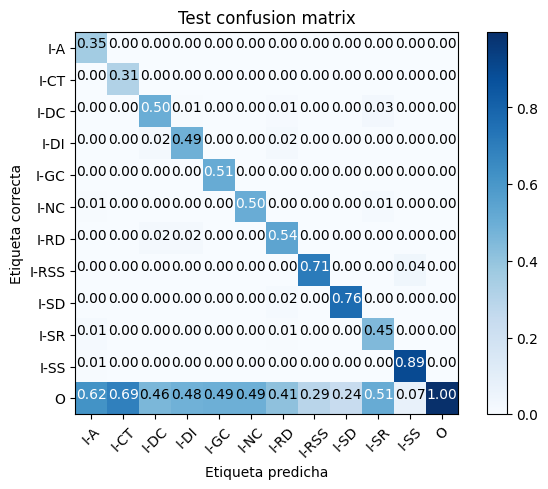

In [75]:
plot_confusion_matrix(confusion_matrix(events_dev.evento, rf_val_pred, normalize='pred'),
                      ['I-A', 'I-CT', 'I-DC', 'I-DI', 'I-GC', 'I-NC', 'I-RD', 'I-RSS', 'I-SD', 'I-SR', 'I-SS', 'O'],
                      title='Test confusion matrix')

##### Árboles de decisión

In [76]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
tree_params = {
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [1, 3],
    'min_samples_split': [2, 3, 5],
}

In [77]:
tree_model = DecisionTreeClassifier(random_state=0)
tree_cv = TuneGridSearchCV(tree_model, tree_params, scoring='f1_macro', cv=kf, n_jobs=8)
tree_cv.fit(X_train, y_train)

TuneGridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
                 estimator=DecisionTreeClassifier(random_state=0), mode='max',
                 n_jobs=8,
                 param_grid={'criterion': ['gini', 'entropy'],
                             'min_samples_leaf': [1, 3],
                             'min_samples_split': [2, 3, 5]},
                 scoring='f1_macro', sk_n_jobs=1)

In [78]:
tree_cv.best_params_, tree_cv.best_score_

({'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2},
 0.7168094242447381)

In [79]:
tree = DecisionTreeClassifier(**tree_cv.best_params_, random_state=0).fit(X_train, y_train)

In [80]:
# Predicción
tree_train_pred = tree.predict(X_train)
tree_val_pred = tree.predict(events_dev_vectors)

In [81]:
print(f'Train report:\n{classification_report(y_train, tree_train_pred)}')

Train report:
              precision    recall  f1-score   support

         I-A       1.00      1.00      1.00       363
        I-CT       1.00      1.00      1.00       498
        I-DC       1.00      1.00      1.00       156
        I-DI       1.00      1.00      1.00       350
        I-GC       1.00      0.99      1.00       150
        I-NC       1.00      1.00      1.00       828
        I-RD       1.00      1.00      1.00       440
       I-RSS       1.00      1.00      1.00        78
        I-SD       1.00      1.00      1.00       122
        I-SR       1.00      1.00      1.00       622
        I-SS       1.00      1.00      1.00       123
           O       1.00      1.00      1.00      3730

    accuracy                           1.00      7460
   macro avg       1.00      1.00      1.00      7460
weighted avg       1.00      1.00      1.00      7460


In [82]:
print(f'Test report:\n{classification_report(events_dev.evento, tree_val_pred)}')

Test report:
              precision    recall  f1-score   support

         I-A       0.04      0.54      0.08        90
        I-CT       0.06      0.70      0.12       125
        I-DC       0.08      0.56      0.14        43
        I-DI       0.21      0.80      0.34        84
        I-GC       0.07      0.70      0.12        40
        I-NC       0.06      0.71      0.11       206
        I-RD       0.23      0.76      0.35       114
       I-RSS       0.07      0.59      0.13        22
        I-SD       0.17      0.74      0.27        31
        I-SR       0.21      0.86      0.34       148
        I-SS       0.06      0.50      0.10        28
           O       1.00      0.86      0.92     47507

    accuracy                           0.85     48438
   macro avg       0.19      0.69      0.25     48438
weighted avg       0.98      0.85      0.91     48438


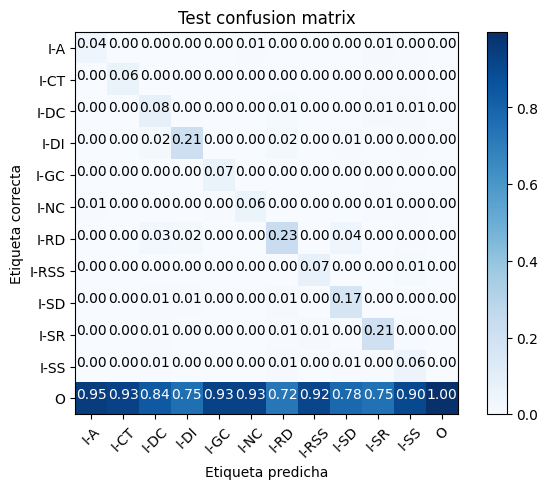

In [83]:
plot_confusion_matrix(confusion_matrix(events_dev.evento, tree_val_pred, normalize='pred'),
                      ['I-A', 'I-CT', 'I-DC', 'I-DI', 'I-GC', 'I-NC', 'I-RD', 'I-RSS', 'I-SD', 'I-SR', 'I-SS', 'O'],
                      title='Test confusion matrix')

##### SVM

In [84]:
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
svm_params = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
}

In [85]:
svc_model = SVC(random_state=0)
svc_cv = TuneGridSearchCV(svc_model, svm_params, scoring='f1_macro', cv=kf, n_jobs=8)
svc_cv.fit(X_train, y_train)

TuneGridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
                 estimator=SVC(random_state=0), mode='max', n_jobs=8,
                 param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
                 scoring='f1_macro', sk_n_jobs=1)

In [86]:
svc_cv.best_params_, svc_cv.best_score_

({'kernel': 'rbf'}, 0.953225939219587)

In [87]:
svc_df = pd.DataFrame(svc_cv.cv_results_)
cols = ['param_kernel', 'mean_test_score', 'std_test_score', 
        'rank_test_score', 'time_total_s']
svc_df[cols].sort_values(by='rank_test_score', ascending=True)

param_kernel  mean_test_score  std_test_score  rank_test_score  time_total_s
2          rbf         0.953226        0.002107                1      9.780701
0       linear         0.941173        0.004701                2      7.177037
1         poly         0.910471        0.004693                3     10.130737
3      sigmoid         0.740900        0.014825                4     10.347282

In [88]:
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
svm_params = {
    'kernel': ['rbf'],
    'C': [1e-2, 1, 5, 10],
}

In [89]:
svc_model = SVC(random_state=0)
svc_cv = TuneGridSearchCV(svc_model, svm_params, scoring='f1_macro', cv=kf, n_jobs=8)
svc_cv.fit(X_train, y_train)

TuneGridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
                 estimator=SVC(random_state=0), mode='max', n_jobs=8,
                 param_grid={'C': [0.01, 1, 5, 10], 'kernel': ['rbf']},
                 scoring='f1_macro', sk_n_jobs=1)

In [90]:
svc_cv.best_params_, svc_cv.best_score_

({'kernel': 'rbf', 'C': 10}, 0.9645678810646396)

In [91]:
svc_df = pd.DataFrame(svc_cv.cv_results_)
cols = ['param_kernel', 'param_C', 'mean_test_score', 'std_test_score', 
        'rank_test_score', 'time_total_s']
svc_df[cols].sort_values(by='rank_test_score', ascending=True)

param_kernel param_C  mean_test_score  std_test_score  rank_test_score  \
3          rbf      10         0.964568        0.003234                1   
2          rbf       5         0.963346        0.002961                2   
1          rbf       1         0.953226        0.002107                3   
0          rbf    0.01         0.175784        0.004830                4   

   time_total_s  
3      8.822350  
2      8.463459  
1      9.529633  
0     24.134269

In [92]:
svc = SVC(**svc_cv.best_params_, random_state=0).fit(X_train, y_train)

In [93]:
# Predicción
svc_train_pred = svc.predict(X_train)
svc_val_pred = svc.predict(events_dev_vectors)

In [94]:
print(f'Train report:\n{classification_report(y_train, svc_train_pred)}')

Train report:
              precision    recall  f1-score   support

         I-A       1.00      1.00      1.00       363
        I-CT       1.00      1.00      1.00       498
        I-DC       1.00      0.99      1.00       156
        I-DI       0.99      1.00      0.99       350
        I-GC       1.00      0.99      1.00       150
        I-NC       1.00      0.99      0.99       828
        I-RD       0.99      1.00      0.99       440
       I-RSS       1.00      1.00      1.00        78
        I-SD       1.00      1.00      1.00       122
        I-SR       0.99      1.00      0.99       622
        I-SS       1.00      1.00      1.00       123
           O       1.00      1.00      1.00      3730

    accuracy                           1.00      7460
   macro avg       1.00      1.00      1.00      7460
weighted avg       1.00      1.00      1.00      7460


In [95]:
print(f'Test report:\n{classification_report(events_dev.evento, svc_val_pred)}')

Test report:
              precision    recall  f1-score   support

         I-A       0.28      0.91      0.42        90
        I-CT       0.31      0.96      0.46       125
        I-DC       0.64      0.81      0.71        43
        I-DI       0.64      0.98      0.77        84
        I-GC       0.29      0.93      0.45        40
        I-NC       0.37      0.94      0.53       206
        I-RD       0.64      0.96      0.77       114
       I-RSS       0.44      1.00      0.61        22
        I-SD       0.72      1.00      0.84        31
        I-SR       0.59      0.97      0.74       148
        I-SS       0.68      0.93      0.79        28
           O       1.00      0.98      0.99     47507

    accuracy                           0.97     48438
   macro avg       0.55      0.95      0.67     48438
weighted avg       0.99      0.97      0.98     48438


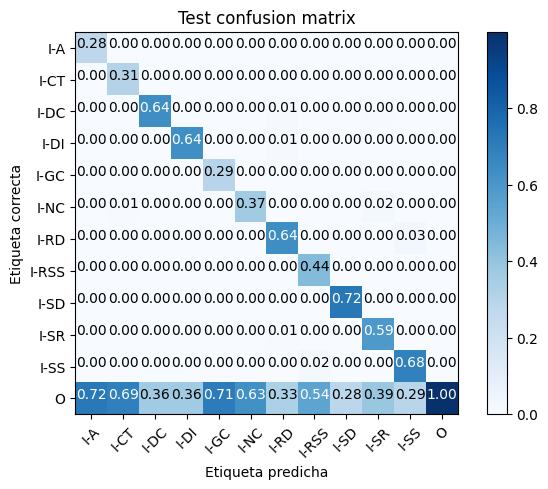

In [96]:
plot_confusion_matrix(confusion_matrix(events_dev.evento, svc_val_pred, normalize='pred'),
                      ['I-A', 'I-CT', 'I-DC', 'I-DI', 'I-GC', 'I-NC', 'I-RD', 'I-RSS', 'I-SD', 'I-SR', 'I-SS', 'O'],
                      title='Test confusion matrix')

Al aplicar la técnica de *under-sampling* en el dataset de entrenamiento, las métricas para este se mantienen casi perfecta, pero las métricas de validación se degradan, incluyendo el *accuracy* que era la mejor métrica que se obtenía en los análisis previos. También encontramos que al intentar balancear los datos en el dataset de *entrenamiento*, cuando reentrenamos los modelos, algunos se modifican.

#### Synthetic Minority Oversampling Technique (SMOTE)

SMOTE o *técnica de sobre-muestreo de minorías sintéticas* es un algoritmo popular para crear observaciones sintéticas de la clase minoritaria.

In [97]:
# Fit sampler
sm = SMOTE(random_state=0)
X_train, y_train = sm.fit_resample(events_train_vectors, events_train.evento)

In [98]:
y_train.value_counts()

evento
O        188018
I-CT     188018
I-NC     188018
I-SR     188018
I-A      188018
I-DI     188018
I-SS     188018
I-GC     188018
I-RD     188018
I-SD     188018
I-DC     188018
I-RSS    188018
Name: count, dtype: int64

Como se observa, esta técnica es similar a *oversampling* analizada previamente, pero en este caso, aplica un sobremuestreo de todas las clases, igualándolas a la cantidad de muestras de la clase mayoritaria. Por lo tanto, como se mencionó anteriormente, no es una buena técnica, ya que si analizamos el caso de la clase minoritaria **I-RSS**, estaríamos repitiendo la misma frase **2410** veces.  

#### Undersampling + SMOTE

Para solventar este problema, utilizaremos una combinación de técnicas de sobremuestreo, aplicando en primera instancia *undersampling* para reducir la clase mayoritaria a la sumatoria de las clases de eventos, y luego utilizar esta técina para igualar la nueva cantidad datos de la clase mayoritaria.

In [99]:
# Undersample
undersampled.evento.value_counts()

evento
O        3730
I-NC      828
I-SR      622
I-CT      498
I-RD      440
I-A       363
I-DI      350
I-DC      156
I-GC      150
I-SS      123
I-SD      122
I-RSS      78
Name: count, dtype: int64

In [100]:
# SMOTE
X_train, y_train = sm.fit_resample(undersampled.drop('evento', axis=1), undersampled.evento)

In [101]:
print(f'New shape: {X_train.shape}')
y_train.value_counts()

New shape: (44760, 300)


evento
I-CT     3730
I-NC     3730
I-SR     3730
I-A      3730
I-DI     3730
I-SS     3730
I-GC     3730
I-RD     3730
I-SD     3730
I-DC     3730
I-RSS    3730
O        3730
Name: count, dtype: int64

De esta forma, logramos sobremuestrear todas las clases, repitiendo la clase minoritaria **48** veces. No es lo óptimo, pero se analizarán los resultados para cada modelo antes de realizar una nueva iteración.

##### Random forest

In [102]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
rf_params = {
    'n_estimators': [10, 50, 100],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [1, 3],
}

In [103]:
rf_model = RandomForestClassifier(random_state=0)
rf_cv = TuneGridSearchCV(rf_model, rf_params, scoring='f1_macro', cv=kf, n_jobs=8)
rf_cv.fit(X_train,y_train)

TuneGridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
                 estimator=RandomForestClassifier(random_state=0), mode='max',
                 n_jobs=8,
                 param_grid={'criterion': ['gini', 'entropy'],
                             'min_samples_leaf': [1, 3],
                             'n_estimators': [10, 50, 100]},
                 scoring='f1_macro', sk_n_jobs=1)

In [104]:
rf_cv.best_params_, rf_cv.best_score_

({'n_estimators': 100, 'criterion': 'gini', 'min_samples_leaf': 1},
 0.9949463318927094)

In [105]:
rf = RandomForestClassifier(**rf_cv.best_params_, random_state=0).fit(X_train, y_train)

In [106]:
# Predicción
rf_train_pred = rf.predict(X_train)
rf_val_pred = rf.predict(events_dev_vectors)

In [107]:
print(f'Train report:\n{classification_report(y_train, rf_train_pred)}')

Train report:
              precision    recall  f1-score   support

         I-A       1.00      1.00      1.00      3730
        I-CT       1.00      1.00      1.00      3730
        I-DC       1.00      1.00      1.00      3730
        I-DI       1.00      1.00      1.00      3730
        I-GC       1.00      1.00      1.00      3730
        I-NC       1.00      1.00      1.00      3730
        I-RD       1.00      1.00      1.00      3730
       I-RSS       1.00      1.00      1.00      3730
        I-SD       1.00      1.00      1.00      3730
        I-SR       1.00      1.00      1.00      3730
        I-SS       1.00      1.00      1.00      3730
           O       1.00      1.00      1.00      3730

    accuracy                           1.00     44760
   macro avg       1.00      1.00      1.00     44760
weighted avg       1.00      1.00      1.00     44760


In [108]:
print(f'Test report:\n{classification_report(events_dev.evento, rf_val_pred)}')

Test report:
              precision    recall  f1-score   support

         I-A       0.20      0.79      0.32        90
        I-CT       0.21      0.90      0.34       125
        I-DC       0.53      0.79      0.64        43
        I-DI       0.47      0.96      0.64        84
        I-GC       0.28      0.93      0.44        40
        I-NC       0.39      0.87      0.54       206
        I-RD       0.50      0.95      0.65       114
       I-RSS       0.33      1.00      0.50        22
        I-SD       0.72      0.94      0.82        31
        I-SR       0.39      0.96      0.56       148
        I-SS       0.60      0.96      0.74        28
           O       1.00      0.97      0.98     47507

    accuracy                           0.97     48438
   macro avg       0.47      0.92      0.60     48438
weighted avg       0.99      0.97      0.97     48438


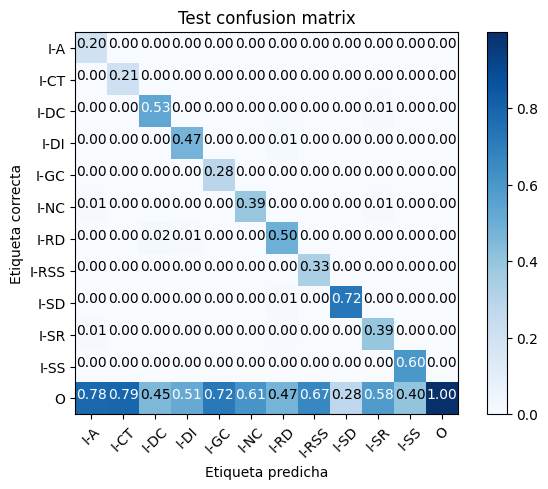

In [109]:
plot_confusion_matrix(confusion_matrix(events_dev.evento, rf_val_pred, normalize='pred'),
                      ['I-A', 'I-CT', 'I-DC', 'I-DI', 'I-GC', 'I-NC', 'I-RD', 'I-RSS', 'I-SD', 'I-SR', 'I-SS', 'O'],
                      title='Test confusion matrix')

##### Árboles de decisión

In [110]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
tree_params = {
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [1, 3],
    'min_samples_split': [2, 3, 5],
}

In [111]:
tree_model = DecisionTreeClassifier(random_state=0)
tree_cv = TuneGridSearchCV(tree_model, tree_params, scoring='f1_macro', cv=kf, n_jobs=8)
tree_cv.fit(X_train, y_train)

TuneGridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
                 estimator=DecisionTreeClassifier(random_state=0), mode='max',
                 n_jobs=8,
                 param_grid={'criterion': ['gini', 'entropy'],
                             'min_samples_leaf': [1, 3],
                             'min_samples_split': [2, 3, 5]},
                 scoring='f1_macro', sk_n_jobs=1)

In [112]:
tree_cv.best_params_, tree_cv.best_score_

({'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2},
 0.9595825513963607)

In [113]:
tree = DecisionTreeClassifier(**tree_cv.best_params_, random_state=0).fit(X_train, y_train)

In [114]:
# Predicción
tree_train_pred = tree.predict(X_train)
tree_val_pred = tree.predict(events_dev_vectors)

In [115]:
print(f'Train report:\n{classification_report(y_train, tree_train_pred)}')

Train report:
              precision    recall  f1-score   support

         I-A       1.00      1.00      1.00      3730
        I-CT       1.00      1.00      1.00      3730
        I-DC       1.00      1.00      1.00      3730
        I-DI       1.00      1.00      1.00      3730
        I-GC       1.00      1.00      1.00      3730
        I-NC       1.00      1.00      1.00      3730
        I-RD       1.00      1.00      1.00      3730
       I-RSS       1.00      1.00      1.00      3730
        I-SD       1.00      1.00      1.00      3730
        I-SR       1.00      1.00      1.00      3730
        I-SS       1.00      1.00      1.00      3730
           O       1.00      1.00      1.00      3730

    accuracy                           1.00     44760
   macro avg       1.00      1.00      1.00     44760
weighted avg       1.00      1.00      1.00     44760


In [116]:
print(f'Test report:\n{classification_report(events_dev.evento, tree_val_pred)}')

Test report:
              precision    recall  f1-score   support

         I-A       0.03      0.64      0.05        90
        I-CT       0.05      0.74      0.09       125
        I-DC       0.07      0.60      0.13        43
        I-DI       0.14      0.83      0.24        84
        I-GC       0.05      0.78      0.09        40
        I-NC       0.05      0.71      0.09       206
        I-RD       0.21      0.75      0.33       114
       I-RSS       0.08      0.64      0.14        22
        I-SD       0.20      0.81      0.31        31
        I-SR       0.14      0.82      0.23       148
        I-SS       0.04      0.71      0.08        28
           O       1.00      0.80      0.89     47507

    accuracy                           0.80     48438
   macro avg       0.17      0.74      0.22     48438
weighted avg       0.98      0.80      0.87     48438


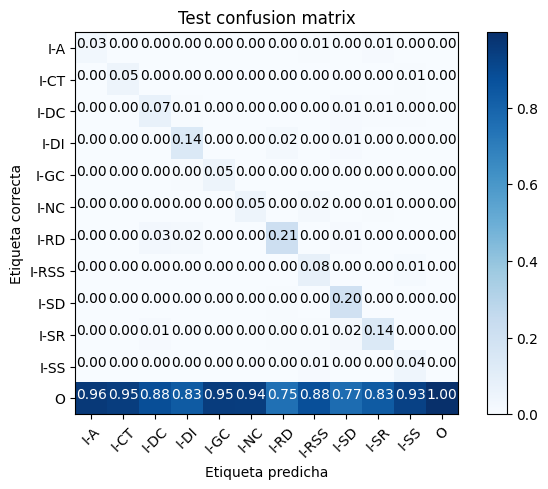

In [117]:
plot_confusion_matrix(confusion_matrix(events_dev.evento, tree_val_pred, normalize='pred'),
                      ['I-A', 'I-CT', 'I-DC', 'I-DI', 'I-GC', 'I-NC', 'I-RD', 'I-RSS', 'I-SD', 'I-SR', 'I-SS', 'O'],
                      title='Test confusion matrix')

##### SVM

In [118]:
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
svm_params = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
}

In [119]:
svc_model = SVC(random_state=0)
svc_cv = TuneGridSearchCV(svc_model, svm_params, scoring='f1_macro', cv=kf, n_jobs=8)
svc_cv.fit(X_train, y_train)

TuneGridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
                 estimator=SVC(random_state=0), mode='max', n_jobs=8,
                 param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
                 scoring='f1_macro', sk_n_jobs=1)

In [120]:
svc_cv.best_params_, svc_cv.best_score_

({'kernel': 'rbf'}, 0.9944624254486343)

In [121]:
svc_df = pd.DataFrame(svc_cv.cv_results_)
cols = ['param_kernel', 'mean_test_score', 'std_test_score', 
        'rank_test_score', 'time_total_s']
svc_df[cols].sort_values(by='rank_test_score', ascending=True)

param_kernel  mean_test_score  std_test_score  rank_test_score  time_total_s
2          rbf         0.994462        0.000205                1    112.647165
1         poly         0.992060        0.000887                2    121.346435
0       linear         0.989720        0.000377                3     78.554037
3      sigmoid         0.895211        0.001714                4    155.267033

In [122]:
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
svm_params = {
    'kernel': ['rbf'],
    'C': [1e-2, 1, 5, 10],
}

In [123]:
svc_model = SVC(random_state=0)
svc_cv = TuneGridSearchCV(svc_model, svm_params, scoring='f1_macro', cv=kf, n_jobs=8)
svc_cv.fit(X_train, y_train)

TuneGridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
                 estimator=SVC(random_state=0), mode='max', n_jobs=8,
                 param_grid={'C': [0.01, 1, 5, 10], 'kernel': ['rbf']},
                 scoring='f1_macro', sk_n_jobs=1)

In [124]:
svc_cv.best_params_, svc_cv.best_score_

({'kernel': 'rbf', 'C': 10}, 0.9969496327752925)

In [125]:
svc_df = pd.DataFrame(svc_cv.cv_results_)
cols = ['param_kernel', 'param_C', 'mean_test_score', 'std_test_score', 
        'rank_test_score', 'time_total_s']
svc_df[cols].sort_values(by='rank_test_score', ascending=True)

param_kernel param_C  mean_test_score  std_test_score  rank_test_score  \
3          rbf      10         0.996950        0.000482                1   
2          rbf       5         0.996614        0.000373                2   
1          rbf       1         0.994462        0.000205                3   
0          rbf    0.01         0.953207        0.000354                4   

   time_total_s  
3     67.128109  
2     70.992806  
1    105.706585  
0    693.429726

In [126]:
svc = SVC(**svc_cv.best_params_, random_state=0).fit(X_train, y_train)

In [127]:
# Predicción
svc_train_pred = svc.predict(X_train)
svc_val_pred = svc.predict(events_dev_vectors)

In [128]:
print(f'Train report:\n{classification_report(y_train, svc_train_pred)}')

Train report:
              precision    recall  f1-score   support

         I-A       1.00      1.00      1.00      3730
        I-CT       1.00      1.00      1.00      3730
        I-DC       1.00      1.00      1.00      3730
        I-DI       1.00      1.00      1.00      3730
        I-GC       1.00      1.00      1.00      3730
        I-NC       1.00      1.00      1.00      3730
        I-RD       1.00      1.00      1.00      3730
       I-RSS       1.00      1.00      1.00      3730
        I-SD       1.00      1.00      1.00      3730
        I-SR       1.00      1.00      1.00      3730
        I-SS       1.00      1.00      1.00      3730
           O       1.00      1.00      1.00      3730

    accuracy                           1.00     44760
   macro avg       1.00      1.00      1.00     44760
weighted avg       1.00      1.00      1.00     44760


In [129]:
print(f'Test report:\n{classification_report(events_dev.evento, svc_val_pred)}')

Test report:
              precision    recall  f1-score   support

         I-A       0.27      0.91      0.42        90
        I-CT       0.29      0.94      0.44       125
        I-DC       0.64      0.81      0.71        43
        I-DI       0.63      0.98      0.76        84
        I-GC       0.30      0.93      0.45        40
        I-NC       0.36      0.94      0.52       206
        I-RD       0.65      0.96      0.78       114
       I-RSS       0.43      1.00      0.60        22
        I-SD       0.72      1.00      0.84        31
        I-SR       0.58      0.97      0.73       148
        I-SS       0.68      0.93      0.79        28
           O       1.00      0.97      0.99     47507

    accuracy                           0.97     48438
   macro avg       0.55      0.95      0.67     48438
weighted avg       0.99      0.97      0.98     48438


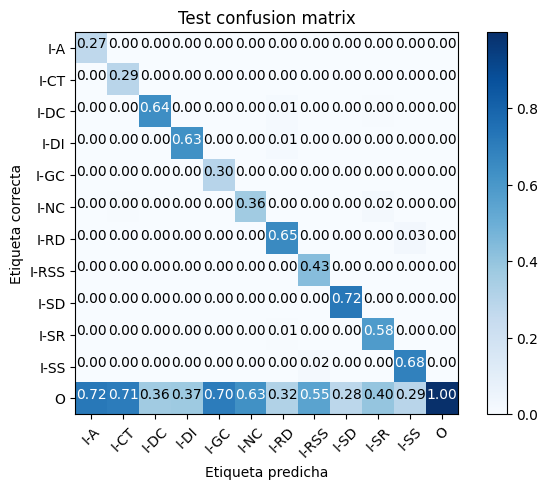

In [130]:
plot_confusion_matrix(confusion_matrix(events_dev.evento, svc_val_pred, normalize='pred'),
                      ['I-A', 'I-CT', 'I-DC', 'I-DI', 'I-GC', 'I-NC', 'I-RD', 'I-RSS', 'I-SD', 'I-SR', 'I-SS', 'O'],
                      title='Test confusion matrix')

Cuando comparamos las métricas obtenidas por los 3 modelos utilizando esta técnica de sobremuestreo, se obtienen valores excelentes en el dataset de *entrenamiento*, pero al analizar las métricas obtenidas en el dataset de *validación*, vemos como se degrada la métrica de *precisión*, pero mejora la de *recall*. Esto significa que los modelos generan pocos *falsos negativos*, por esto es que la métrica *recall* aumenta, pero se incrementan los *falsos positivos*, degradando la métrica *precision*.

Se realizará una nueva iteración, donde se reducirá aún más el dataset con el objetivo de evitar grandes sobremuestreos de las clases minoritarias, por lo que en este caso, se definirá como límite la clase mayoritaria dentro de los eventos como tope para las frases sin eventos.

In [131]:
# Under-sample
event_undersampled = resample(not_event,
                              replace=True, # sample with replacement 
                              n_samples=event.evento.value_counts()[0], # match number in minority class
                              random_state=0) # reproducible results

# Combine minority and under-sampled majority
undersampled = pd.concat([event, event_undersampled])

# Check new class counts
undersampled.evento.value_counts()

evento
I-NC     828
O        828
I-SR     622
I-CT     498
I-RD     440
I-A      363
I-DI     350
I-DC     156
I-GC     150
I-SS     123
I-SD     122
I-RSS     78
Name: count, dtype: int64

In [132]:
# SMOTE
X_train, y_train = sm.fit_resample(undersampled.drop('evento', axis=1), undersampled.evento)

In [133]:
print(f'New shape: {X_train.shape}')
y_train.value_counts()

New shape: (9936, 300)


evento
I-CT     828
I-NC     828
I-SR     828
I-A      828
I-DI     828
I-SS     828
I-GC     828
I-RD     828
I-SD     828
I-DC     828
I-RSS    828
O        828
Name: count, dtype: int64

De esta forma, la clase minoritaria **I-RSS** solo repite **10** veces la misma frase en el *resample*, obteniendo un tamaño final de **9936** registros en el dataset.

##### Random forest

In [134]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
rf_params = {
    'n_estimators': [10, 50, 100],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [1, 3],
}

In [135]:
rf_model = RandomForestClassifier(random_state=0)
rf_cv = TuneGridSearchCV(rf_model, rf_params, scoring='f1_macro', cv=kf, n_jobs=8)
rf_cv.fit(X_train,y_train)

TuneGridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
                 estimator=RandomForestClassifier(random_state=0), mode='max',
                 n_jobs=8,
                 param_grid={'criterion': ['gini', 'entropy'],
                             'min_samples_leaf': [1, 3],
                             'n_estimators': [10, 50, 100]},
                 scoring='f1_macro', sk_n_jobs=1)

In [136]:
rf_cv.best_params_, rf_cv.best_score_

({'n_estimators': 100, 'criterion': 'gini', 'min_samples_leaf': 1},
 0.9778427857967051)

In [137]:
rf = RandomForestClassifier(**rf_cv.best_params_, random_state=0).fit(X_train, y_train)

In [138]:
# Predicción
rf_train_pred = rf.predict(X_train)
rf_val_pred = rf.predict(events_dev_vectors)

In [139]:
print(f'Train report:\n{classification_report(y_train, rf_train_pred)}')

Train report:
              precision    recall  f1-score   support

         I-A       1.00      1.00      1.00       828
        I-CT       1.00      1.00      1.00       828
        I-DC       1.00      1.00      1.00       828
        I-DI       1.00      1.00      1.00       828
        I-GC       1.00      1.00      1.00       828
        I-NC       1.00      1.00      1.00       828
        I-RD       1.00      1.00      1.00       828
       I-RSS       1.00      1.00      1.00       828
        I-SD       1.00      1.00      1.00       828
        I-SR       1.00      1.00      1.00       828
        I-SS       1.00      1.00      1.00       828
           O       1.00      1.00      1.00       828

    accuracy                           1.00      9936
   macro avg       1.00      1.00      1.00      9936
weighted avg       1.00      1.00      1.00      9936


In [140]:
print(f'Test report:\n{classification_report(events_dev.evento, rf_val_pred)}')

Test report:
              precision    recall  f1-score   support

         I-A       0.07      0.90      0.13        90
        I-CT       0.10      0.97      0.18       125
        I-DC       0.33      0.84      0.47        43
        I-DI       0.33      0.99      0.50        84
        I-GC       0.09      0.95      0.17        40
        I-NC       0.12      0.91      0.20       206
        I-RD       0.38      0.94      0.54       114
       I-RSS       0.22      1.00      0.36        22
        I-SD       0.68      0.97      0.80        31
        I-SR       0.29      0.97      0.45       148
        I-SS       0.44      0.96      0.61        28
           O       1.00      0.90      0.95     47507

    accuracy                           0.90     48438
   macro avg       0.34      0.94      0.45     48438
weighted avg       0.98      0.90      0.94     48438


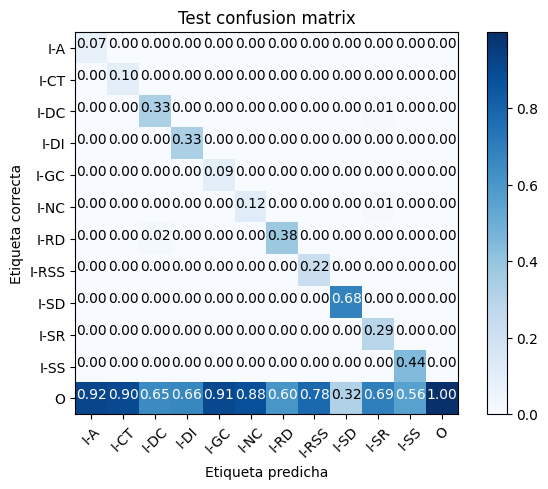

In [141]:
plot_confusion_matrix(confusion_matrix(events_dev.evento, rf_val_pred, normalize='pred'),
                      ['I-A', 'I-CT', 'I-DC', 'I-DI', 'I-GC', 'I-NC', 'I-RD', 'I-RSS', 'I-SD', 'I-SR', 'I-SS', 'O'],
                      title='Test confusion matrix')

##### Árboles de decisión

In [142]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
tree_params = {
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [1, 3],
    'min_samples_split': [2, 3, 5],
}

In [143]:
tree_model = DecisionTreeClassifier(random_state=0)
tree_cv = TuneGridSearchCV(tree_model, tree_params, scoring='f1_macro', cv=kf, n_jobs=8)
tree_cv.fit(X_train, y_train)

TuneGridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
                 estimator=DecisionTreeClassifier(random_state=0), mode='max',
                 n_jobs=8,
                 param_grid={'criterion': ['gini', 'entropy'],
                             'min_samples_leaf': [1, 3],
                             'min_samples_split': [2, 3, 5]},
                 scoring='f1_macro', sk_n_jobs=1)

In [144]:
tree_cv.best_params_, tree_cv.best_score_

({'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2},
 0.881777355031051)

In [145]:
tree = DecisionTreeClassifier(**tree_cv.best_params_, random_state=0).fit(X_train, y_train)

In [146]:
# Predicción
tree_train_pred = tree.predict(X_train)
tree_val_pred = tree.predict(events_dev_vectors)

In [147]:
print(f'Train report:\n{classification_report(y_train, tree_train_pred)}')

Train report:
              precision    recall  f1-score   support

         I-A       1.00      1.00      1.00       828
        I-CT       1.00      1.00      1.00       828
        I-DC       1.00      1.00      1.00       828
        I-DI       1.00      1.00      1.00       828
        I-GC       1.00      1.00      1.00       828
        I-NC       1.00      1.00      1.00       828
        I-RD       1.00      1.00      1.00       828
       I-RSS       1.00      1.00      1.00       828
        I-SD       1.00      1.00      1.00       828
        I-SR       1.00      1.00      1.00       828
        I-SS       1.00      1.00      1.00       828
           O       1.00      1.00      1.00       828

    accuracy                           1.00      9936
   macro avg       1.00      1.00      1.00      9936
weighted avg       1.00      1.00      1.00      9936


In [148]:
print(f'Test report:\n{classification_report(events_dev.evento, tree_val_pred)}')

Test report:
              precision    recall  f1-score   support

         I-A       0.02      0.67      0.04        90
        I-CT       0.03      0.72      0.06       125
        I-DC       0.04      0.63      0.07        43
        I-DI       0.08      0.79      0.14        84
        I-GC       0.03      0.72      0.06        40
        I-NC       0.03      0.76      0.06       206
        I-RD       0.13      0.83      0.22       114
       I-RSS       0.04      0.73      0.08        22
        I-SD       0.09      0.81      0.16        31
        I-SR       0.10      0.82      0.18       148
        I-SS       0.03      0.71      0.06        28
           O       1.00      0.68      0.81     47507

    accuracy                           0.68     48438
   macro avg       0.13      0.74      0.16     48438
weighted avg       0.98      0.68      0.80     48438


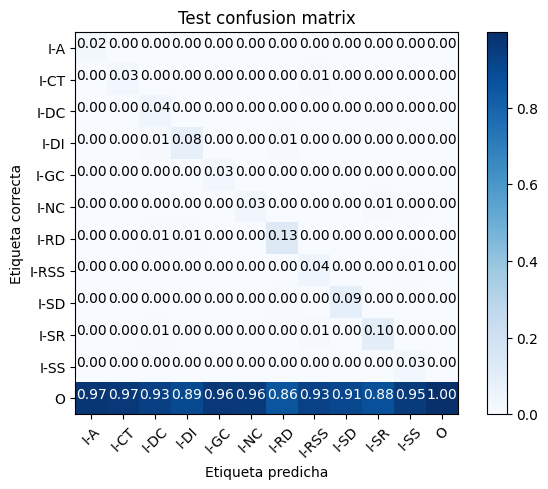

In [149]:
plot_confusion_matrix(confusion_matrix(events_dev.evento, tree_val_pred, normalize='pred'),
                      ['I-A', 'I-CT', 'I-DC', 'I-DI', 'I-GC', 'I-NC', 'I-RD', 'I-RSS', 'I-SD', 'I-SR', 'I-SS', 'O'],
                      title='Test confusion matrix')

##### SVM

In [150]:
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
svm_params = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
}

In [151]:
svc_model = SVC(random_state=0)
svc_cv = TuneGridSearchCV(svc_model, svm_params, scoring='f1_macro', cv=kf, n_jobs=8)
svc_cv.fit(X_train, y_train)

TuneGridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
                 estimator=SVC(random_state=0), mode='max', n_jobs=8,
                 param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
                 scoring='f1_macro', sk_n_jobs=1)

In [152]:
svc_cv.best_params_, svc_cv.best_score_

({'kernel': 'rbf'}, 0.9825659454910838)

In [153]:
svc_df = pd.DataFrame(svc_cv.cv_results_)
cols = ['param_kernel', 'mean_test_score', 'std_test_score', 
        'rank_test_score', 'time_total_s']
svc_df[cols].sort_values(by='rank_test_score', ascending=True)

param_kernel  mean_test_score  std_test_score  rank_test_score  time_total_s
2          rbf         0.982566        0.003171                1      9.747872
0       linear         0.979818        0.003011                2      5.834690
1         poly         0.977045        0.003449                3      8.969843
3      sigmoid         0.916355        0.005043                4     11.200236

In [154]:
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
svm_params = {
    'kernel': ['rbf'],
    'C': [1e-2, 1, 5, 10],
}

In [155]:
svc_model = SVC(random_state=0)
svc_cv = TuneGridSearchCV(svc_model, svm_params, scoring='f1_macro', cv=kf, n_jobs=8)
svc_cv.fit(X_train, y_train)

TuneGridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
                 estimator=SVC(random_state=0), mode='max', n_jobs=8,
                 param_grid={'C': [0.01, 1, 5, 10], 'kernel': ['rbf']},
                 scoring='f1_macro', sk_n_jobs=1)

In [156]:
svc_cv.best_params_, svc_cv.best_score_

({'kernel': 'rbf', 'C': 10}, 0.9868580070179327)

In [157]:
svc_df = pd.DataFrame(svc_cv.cv_results_)
cols = ['param_kernel', 'param_C', 'mean_test_score', 'std_test_score', 
        'rank_test_score', 'time_total_s']
svc_df[cols].sort_values(by='rank_test_score', ascending=True)

param_kernel param_C  mean_test_score  std_test_score  rank_test_score  \
3          rbf      10         0.986858        0.002771                1   
2          rbf       5         0.986757        0.001890                2   
1          rbf       1         0.982566        0.003171                3   
0          rbf    0.01         0.852595        0.016598                4   

   time_total_s  
3      7.960168  
2      7.947687  
1     10.279801  
0     59.144816

In [158]:
svc = SVC(**svc_cv.best_params_, random_state=0).fit(X_train, y_train)

In [159]:
# Predicción
svc_train_pred = svc.predict(X_train)
svc_val_pred = svc.predict(events_dev_vectors)

In [160]:
print(f'Train report:\n{classification_report(y_train, svc_train_pred)}')

Train report:
              precision    recall  f1-score   support

         I-A       1.00      1.00      1.00       828
        I-CT       1.00      1.00      1.00       828
        I-DC       1.00      1.00      1.00       828
        I-DI       1.00      1.00      1.00       828
        I-GC       1.00      1.00      1.00       828
        I-NC       1.00      0.99      1.00       828
        I-RD       1.00      1.00      1.00       828
       I-RSS       1.00      1.00      1.00       828
        I-SD       1.00      1.00      1.00       828
        I-SR       0.99      1.00      1.00       828
        I-SS       1.00      1.00      1.00       828
           O       1.00      1.00      1.00       828

    accuracy                           1.00      9936
   macro avg       1.00      1.00      1.00      9936
weighted avg       1.00      1.00      1.00      9936


In [161]:
print(f'Test report:\n{classification_report(events_dev.evento, svc_val_pred)}')

Test report:
              precision    recall  f1-score   support

         I-A       0.14      0.94      0.25        90
        I-CT       0.17      0.98      0.29       125
        I-DC       0.46      0.86      0.60        43
        I-DI       0.49      0.98      0.66        84
        I-GC       0.17      0.95      0.29        40
        I-NC       0.19      0.95      0.32       206
        I-RD       0.49      0.97      0.65       114
       I-RSS       0.23      1.00      0.37        22
        I-SD       0.67      1.00      0.81        31
        I-SR       0.38      0.98      0.55       148
        I-SS       0.45      0.93      0.60        28
           O       1.00      0.94      0.97     47507

    accuracy                           0.94     48438
   macro avg       0.40      0.96      0.53     48438
weighted avg       0.99      0.94      0.96     48438


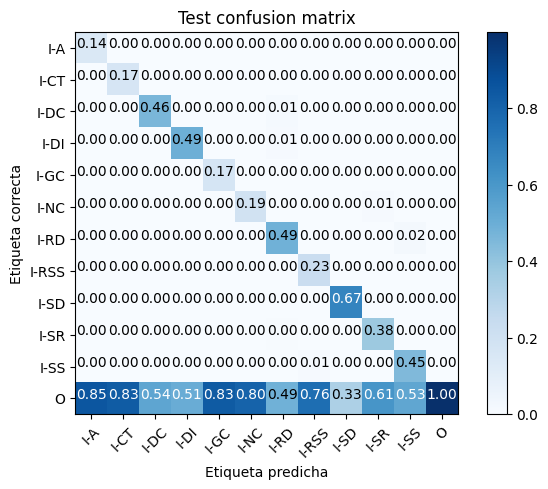

In [162]:
plot_confusion_matrix(confusion_matrix(events_dev.evento, svc_val_pred, normalize='pred'), 
                      ['I-A', 'I-CT', 'I-DC', 'I-DI', 'I-GC', 'I-NC', 'I-RD', 'I-RSS', 'I-SD', 'I-SR', 'I-SS', 'O'],
                      title='Test confusion matrix')

En esta nueva iteración se obtienen similares a los obtenidos en la iteración anterior, las métricas de *recall* mejoran pero empeoran las *precision*.

### Evaluación

Finalmente, al comparar las métricas obtenidas por los 3 modelos y luego de haber reentrenado los mismos utilizando las distintas técnicas de muestreo y combinaciones de estas, llegamos a la conclusión que aplicando estas técnicas de muestreo se mejora en gran medida la métrica **recall**, pero por contra parte se deteriora la métrica **precision**. Esto ocasiona que nuestro modelo prediga eventos financieros correctamente en gran proporción (recall, true positive) pero que prediga como eventos financieros, frases que son de tipo **O** debido a la degradación de la precisión (false positive).  
Por otra parte, si analizamos las métricas de los modelos entrenados sin utilizar técnicas de sobremuestreo, nos encontramos con que los mejores resultados se obtienen utilizando el modelo **SVM***, seguido por *RandomForest* y finalizando con *Árboles de decisión*.  
Las métricas obtenidas usando ***SVM*** se encuentran en promedio en el **80%**, que se puede tomar como aceptable teniendo en cuenta el gran desbalance que existe en los eventos. 

### Guardado del modelo

Analizadas y comparadas las métricas se decide continuar con el modelo ***SVM***. A fines de evitar tiempos de entrenamiento, se almacenará el modelo ya entrenado para poder utilizarlo en futuras predicciones.

In [8]:
# Creación de carpeta contenedora
import os

container_dir = './models'
if not os.path.exists(container_dir):
    os.mkdir(container_dir)

In [9]:
# Guardado de modelo SVM
joblib.dump(value=svc, filename=os.path.join(container_dir, 'best.pkl'), compress=3) 

['./models/best.pkl']